<a href="https://colab.research.google.com/github/barkamoljon/data_science_praktikum/blob/main/LinerRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Jovian Commit Essentials
# Please retain and execute this cell without modifying the contents for `jovian.commit` to work
!pip install jovian --upgrade -q
import jovian
jovian.set_project('05-ml-07-linerregression')
jovian.set_colab_id('1dWyqEasxo4hPSLIJdXCQyFAI2ukhK2wg')

     |████████████████████████████████| 68 kB 2.0 MB/s 


![Imgur](https://i.imgur.com/5pXzCIu.png)

# Data Science va Sun'iy Intellekt Praktikum

## 5-MODUL. Machine Learning. 

### Linear Regression

In [ ]:
import pandas as pd
import numpy as np


In [ ]:
df=pd.read_csv("https://raw.githubusercontent.com/anvarnarz/praktikum_datasets/main/housing_LR.csv",index_col=0)
df.head(10)


,district,rooms,size,level,max_levels,price
0,Юнусабадский,3,57.0,4,4,52000.0
1,Яккасарайский,2,52.0,4,5,56000.0
2,Чиланзарский,2,42.0,4,4,37000.0
3,Чиланзарский,3,65.0,1,4,49500.0
4,Чиланзарский,3,70.0,3,5,55000.0
5,Чиланзарский,1,28.0,1,4,25500.0
6,Чиланзарский,1,30.0,2,4,21200.0
7,Яккасарайский,2,32.0,5,5,20000.0
8,Учтепинский,2,51.0,3,4,26200.0
9,Чиланзарский,1,30.0,1,4,22200.0


# Ustunlar ta'rifi
- `location` - sotilayotgan uy manzili
- `district` - uy joylashgan tuman
- `rooms` - xonalar soni
- `size` - uy maydoni (kv.m)
- `level` - uy

In [ ]:
df['district'].value_counts()

Чиланзарский         1616
Мирзо-Улугбекский    1342
Учтепинский           872
Юнусабадский          847
Мирабадский           717
Яккасарайский         628
Яшнободский           456
Шайхантахурский       356
Олмазорский           262
Сергелийский          159
Янгихаётский           15
Бектемирский            8
Name: district, dtype: int64

**Darsimiz uchun Chilonzor tumanidagi uylarning narxini bashorat qilib ko'ramiz**

In [ ]:
housing = df[df.district=='Чиланзарский']
housing.head()

,district,rooms,size,level,max_levels,price
2,Чиланзарский,2,42.0,4,4,37000.0
3,Чиланзарский,3,65.0,1,4,49500.0
4,Чиланзарский,3,70.0,3,5,55000.0
5,Чиланзарский,1,28.0,1,4,25500.0
6,Чиланзарский,1,30.0,2,4,21200.0


In [ ]:
X = housing['size']
X

2       42.0
3       65.0
4       70.0
5       28.0
6       30.0
        ... 
7404    70.0
7422    20.0
7433    32.0
7445    70.0
7464    30.0
Name: size, Length: 1616, dtype: float64

In [ ]:
y = housing['price']
y

2       37000.0
3       49500.0
4       55000.0
5       25500.0
6       21200.0
         ...   
7404    48000.0
7422    18500.0
7433    28000.0
7445    49800.0
7464    22914.0
Name: price, Length: 1616, dtype: float64

**Narx va uy maydoni o'rtasida chiziqli bog'liqlik bor ekanini tekshirib ko'ramiz.**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

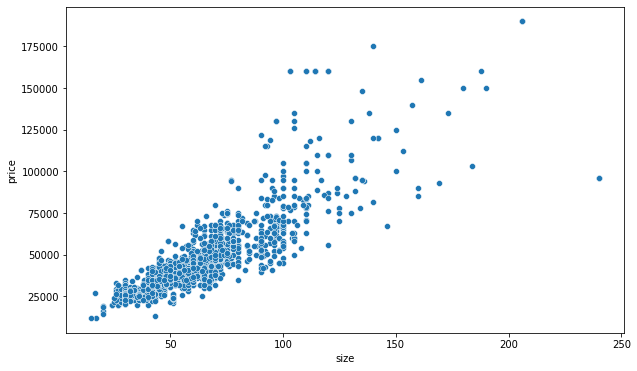

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=housing, x='size', y='price')
plt.show()

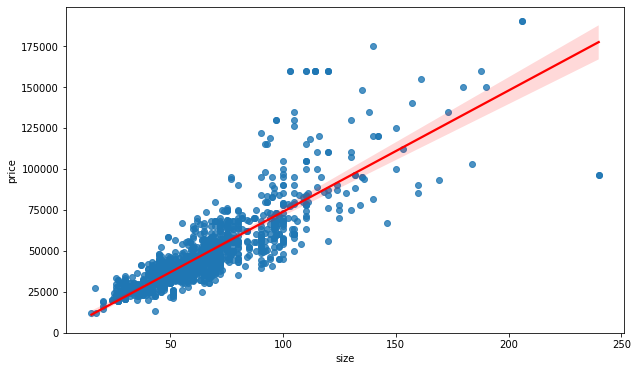

In [ ]:
plt.figure(figsize=(10,6))
sns.regplot(data=housing, x='size', y='price', line_kws={"color": "red"})
plt.show()

## 1-Vazifa
Sizning vazifangiz yuqoridagi `X` va `y` o'zgaruvchilardan quyidagi formuladan foydalangan xolda $\theta_0$ va $\theta_1$ koeffisientlarni hisoblash.

![Imgur](https://i.imgur.com/zZoXZxI.png)

Bu yerda $\tilde{x}$ - `X` ustun uchun o'rtracha qiymat,  $\tilde{y}$ - `y` ustun uchun o'rtracha qiymat

In [ ]:
import numpy as np

Xmean = np.mean(X)
ymean = np.mean(y) 

In [ ]:
theta1 = sum((X-Xmean)*(y-ymean))/sum((X-Xmean)**2)
print('theta1:',theta1)

theta1: 740.0264822713287


In [ ]:
theta0 = ymean - theta1*Xmean
print('theta0:',theta0)


theta0: -195.94911352690542


## 2-Vazifa
`X` dan bir nechta tasodifiy qiymatlarni ajratib oling va ularga mos keluvchi `y` ni yuqoridagi koeffisientlar yordamida hisoblab ko'ring.

![Imgur](https://i.imgur.com/iT5tffj.png)

In [ ]:
x_test = housing.sample(10, random_state=42)['size'].to_numpy()
print('x_test:',x_test)
y_test = housing.sample(10, random_state=42)['price'].to_numpy()
print('y_test:',y_test)

x_test: [54. 42. 36. 60. 48. 68. 38. 65. 52. 44.]
y_test: [37500. 26500. 25500. 39000. 32500. 34500. 22700. 47000. 37900. 36000.]


In [ ]:
y_predict = theta0 + theta1*x_test
print('y_predict:',y_predict)

y_predict: [39765.48092912 30885.16314187 26445.00424824 44205.63982275
 35325.3220355  50125.85168092 27925.05721278 47905.77223411
 38285.42796458 32365.21610641]


## 3-Vazifa

Hisoblangan va asl qiymtlar o'rtasidagi RMSE (root mean square error), MAE (mean absolute error) hisoblang.

![Imgur](https://i.imgur.com/GJH9CGy.png)

![Imgur](https://i.imgur.com/aXL9iWa.png)

In [ ]:
MAE = np.sum(np.absolute(y_predict-y_test)/len(y_test))
RMSE = np.sqrt(np.sum((y_predict-y_test)**2)/len(y_test))
print("MAE:", MAE)
print("RMSE:", RMSE)

MAE: 4140.35031634715
RMSE: 5882.051673173715


# Scikit-learn yordamida LR
Keling endi yuqoridagi amallarni scikit-learn yordamida bajaramiz.



In [ ]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.10, random_state=42)

In [ ]:
from sklearn import linear_model
LR_model = linear_model.LinearRegression()

x_train = np.asanyarray(train_set[['size']])
y_train = np.asanyarray(train_set[['price']])

# Modelni tarbiyalaymiz (train)
LR_model.fit(x_train, y_train)

#theta1 va theta0 koeefisentlarni ajratib olamiz 
theta1 = LR_model.coef_[0][0]
theta0 = LR_model.intercept_[0]
print('theta0:',theta0)
print('theta1:',theta1)

theta0: 106.31843170110369
theta1: 732.7784051414766


$\theta_0$ va $\theta_1$ qiymatlari yordamida to'g'ri chiziq chizamiz

Text(0, 0.5, 'Price')

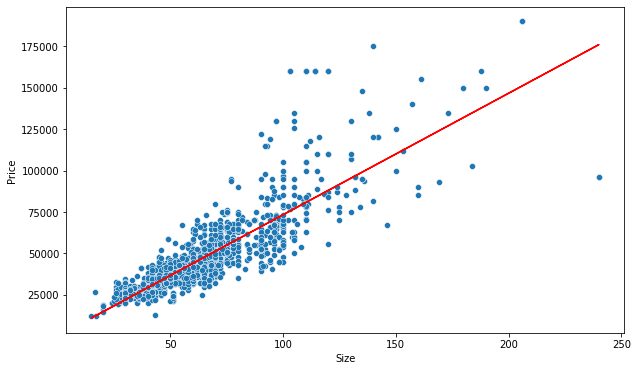

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=housing, x='size', y='price')
plt.plot(x_train, theta1*x_train + theta0, '-r')
plt.xlabel("Size")
plt.ylabel("Price")

### Modelni baholaymiz

In [ ]:
x_test = np.asanyarray(test_set[['size']])
y_test = np.asanyarray(test_set[['price']])

In [ ]:
y_predict = LR_model.predict(x_test)


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

MAE = mean_absolute_error(y_test, y_predict)
RMSE = np.sqrt(mean_squared_error(y_test, y_predict))
print("MAE:", MAE)
print("RMSE:", RMSE)

MAE: 7269.709648262382
RMSE: 12734.803748258666
